In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [2]:
delta = 0.025
x, y = np.meshgrid(np.arange(-3.0, 3.0, delta), np.arange(-2.0, 2.0, delta))
z1 = np.exp(-x ** 2 - y ** 2)
z2 = np.exp(-(x - 1) ** 2 - (y - 1) ** 2)
z = (z1 - z2) * 2

In [3]:
# make contour labels with custom level formatters
def fmt(x):
    s = f"{x:.1f}"
    if s.endswith("0"):
        s = f"{x:.0f}"
    return rf"{s} \%" if plt.rcParams["text.usetex"] else f"{s} %"

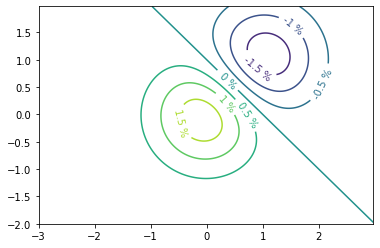

In [4]:
# basic contour plot
fig, ax = plt.subplots()

cs = ax.contour(x, y, z)
ax.clabel(cs, cs.levels, inline=True, fmt=fmt, fontsize=10)
plt.show()

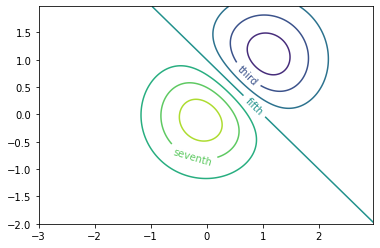

In [5]:
# label contours with arbitrary strings using a dictionary
fig1, ax1 = plt.subplots()

cs1 = ax1.contour(x, y, z)

fmt = {}
strs = ["first", "second", "third", "fourth", "fifth", "sixth", "seventh"]
for l, s in zip(cs1.levels, strs):
    fmt[l] = s

# label every other level using strings
ax1.clabel(cs1, cs1.levels[::2], inline=True, fmt=fmt, fontsize=10)
plt.show()

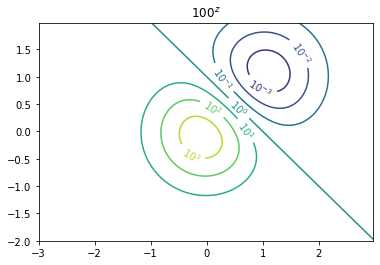

In [6]:
# use a formatter
fig2, ax2 = plt.subplots()

cs2 = ax2.contour(x, y, 100 ** z, locator=plt.LogLocator())
fmt = ticker.LogFormatterMathtext()
fmt.create_dummy_axis()
ax2.clabel(cs2, cs2.levels, fmt=fmt)
ax2.set_title("$100^z$")

plt.show()